# Introduction to linear modeling

In [1]:
# This dataset can be downloaded from
# Veridical Data Science by Yu and Barter
# https://vdsbook.com/
# https://github.com/Yu-Group/vds-book-supplementary

library(tidyverse)

theme_update(text = element_text(size=24))
options(repr.plot.width=12, repr.plot.height=6)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [2]:
git_repo_dir <- "/home/rgiordan/Documents/git_repos/stat151a"
housing_dir <- file.path(git_repo_dir, "datasets/ames_house/data")
ames_orig <- read.table(file.path(housing_dir, "AmesHousing.txt"), sep="\t", header=T)

We will follow some of the cleaning suggestions in the [VDS
book](https://vdsbook.com/08-prediction_intro#sec-cleaning-ames), and
also look only at “good” and “excellent” kitchens.

In [3]:
ames <- ames_orig %>%
  filter(Sale.Condition == "Normal",
         # remove agricultural, commercial and industrial
         !(MS.Zoning %in% c("A (agr)", "C (all)", "I (all)"))) %>%
  filter(Kitchen.Qual %in% c("Gd", "Ex")) %>%
  mutate(Overall.Qual=factor(Overall.Qual))

The dataset lists different “kitchen quality” measures:

    KitchenQual (Ordinal): Kitchen quality
           Ex       Excellent
           Gd       Good
           TA       Typical/Average
           Fa       Fair
           Po       Poor

# Inference

Suppose we are interested in how much we might increase the value of our
house by upgrading from a “good” kitchen to an “excellent” kitchen.

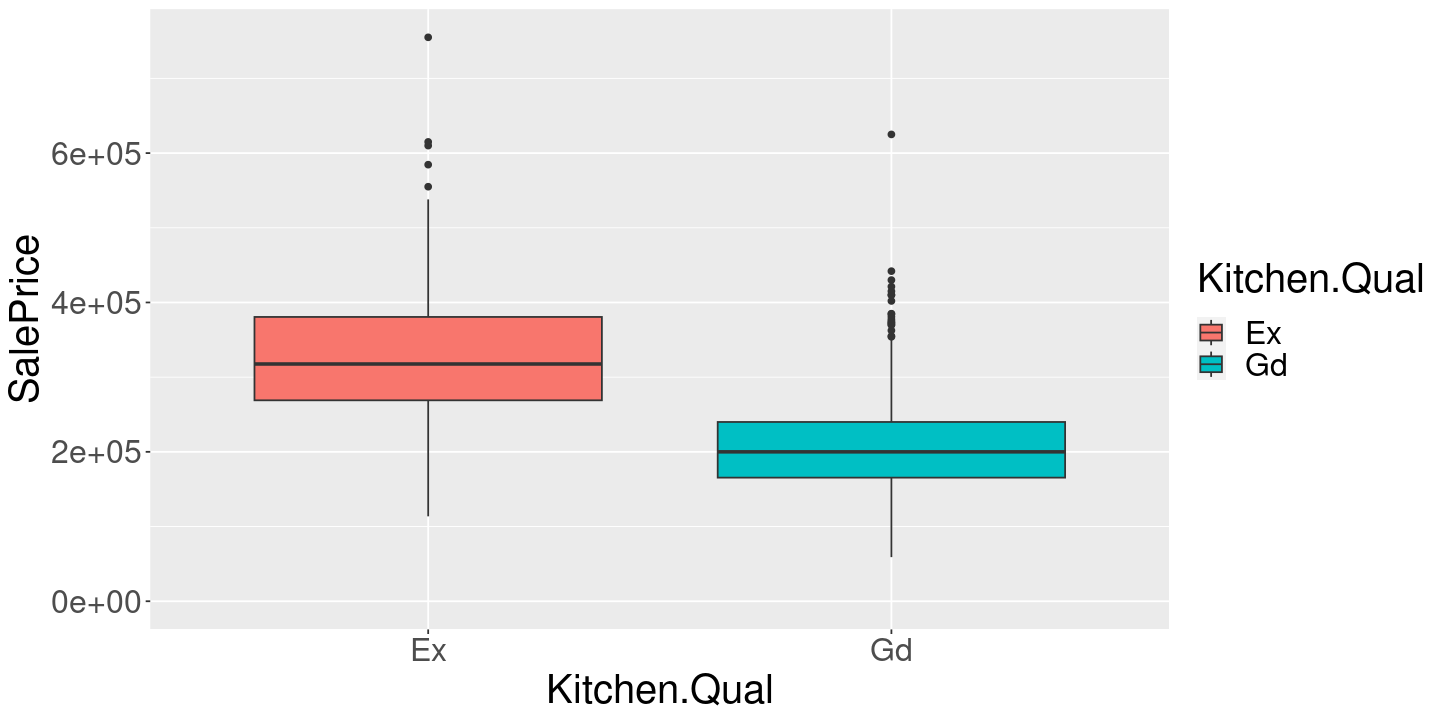

In [4]:
ames %>%
  ggplot() +
      geom_boxplot(aes(x=Kitchen.Qual, y=SalePrice, fill=Kitchen.Qual))+
      expand_limits(y=0)

In [5]:
ames %>%
    group_by(Kitchen.Qual) %>%
    summarize(mean_price=mean(SalePrice)) %>%
    pivot_wider(names_from=Kitchen.Qual, values_from=mean_price) %>%
    mutate(difference=Ex - Gd)

We also have

    Overall Qual (Ordinal): Rates the overall material and finish of the house

           10       Very Excellent
           9        Excellent
           8        Very Good
           7        Good
           6        Above Average
           5        Average
           4        Below Average
           3        Fair
           2        Poor
           1        Very Poor

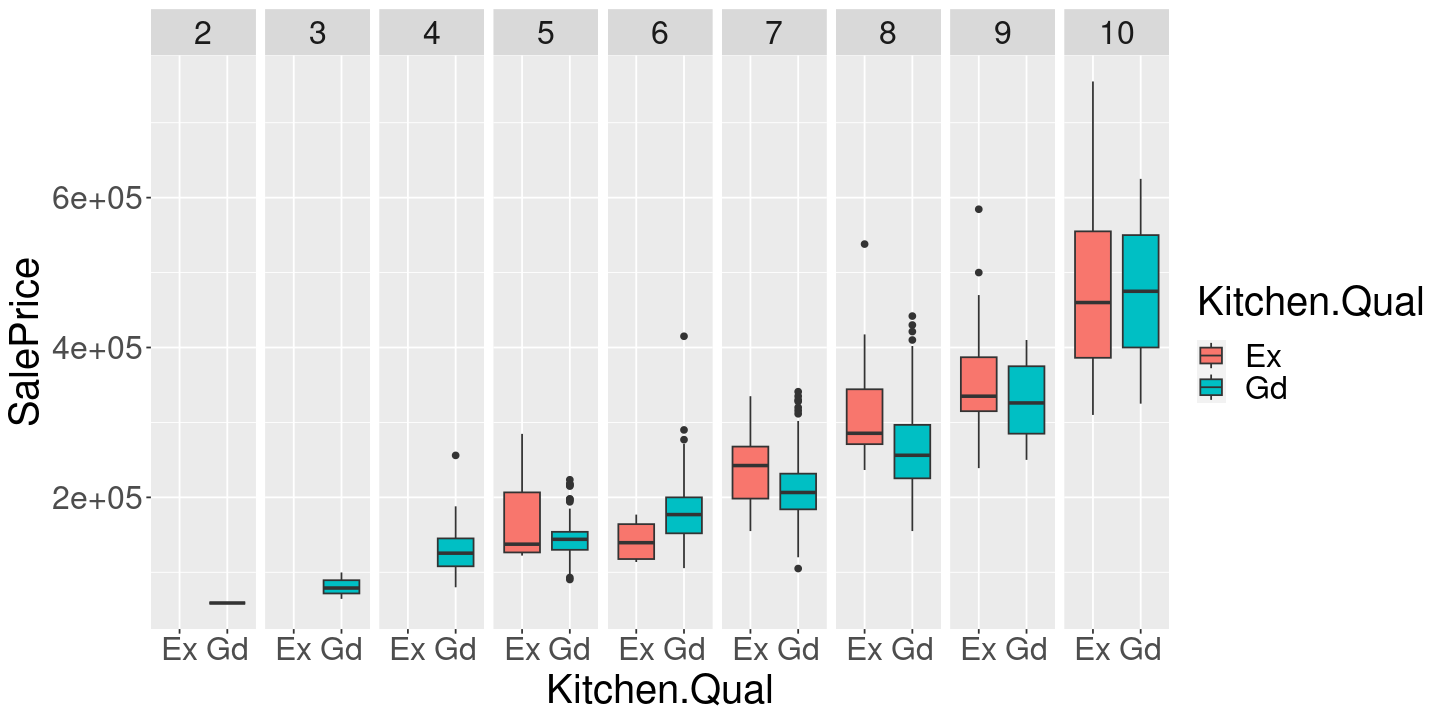

In [6]:
ames %>%
  ggplot() +20
  geom_boxplot(aes(x=Kitchen.Qual, y=SalePrice, fill=Kitchen.Qual)) +
  facet_grid( ~ Overall.Qual)


In [7]:
ames %>%
    group_by(Overall.Qual, Kitchen.Qual) %>%
    summarize(mean_price=mean(SalePrice), .groups="drop") %>%
    pivot_wider(id_cols=Overall.Qual, names_from=Kitchen.Qual, values_from=mean_price) %>%
    mutate(difference=Ex - Gd)

What about living area? Unfortunately this is now a continuous variable.

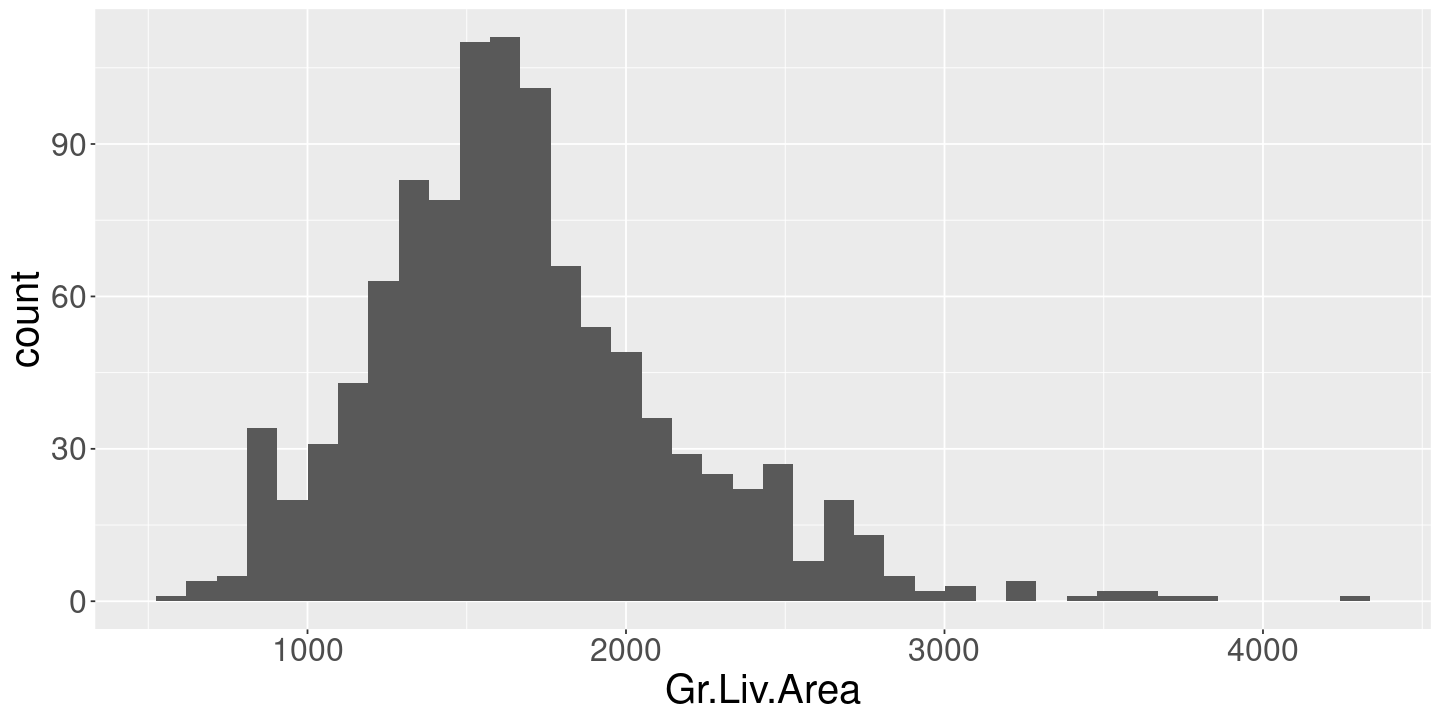

In [8]:
ames %>%
    ggplot() +
      geom_histogram(aes(x=Gr.Liv.Area), bins=40)

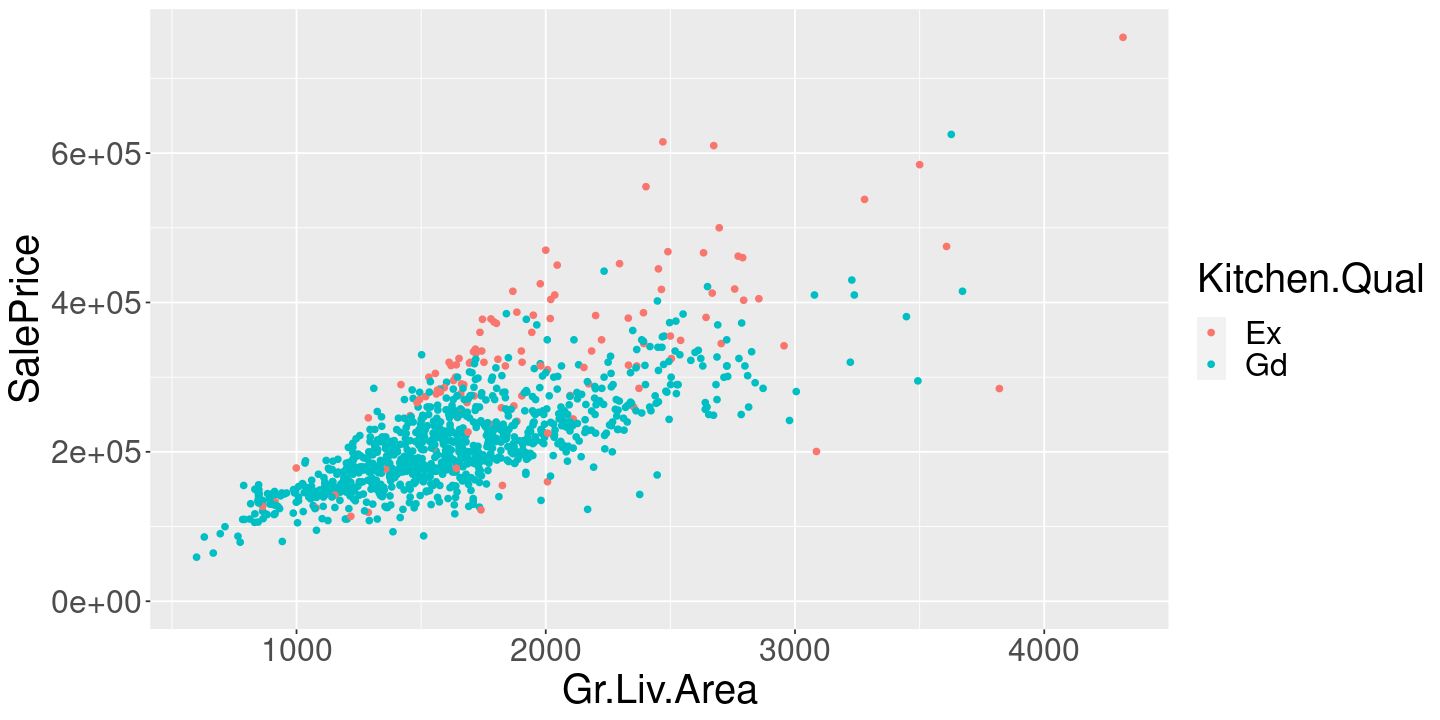

In [9]:
ames %>%
  ggplot() +
  geom_point(aes(x=Gr.Liv.Area, y=SalePrice, color=Kitchen.Qual)) +
  expand_limits(y=0)

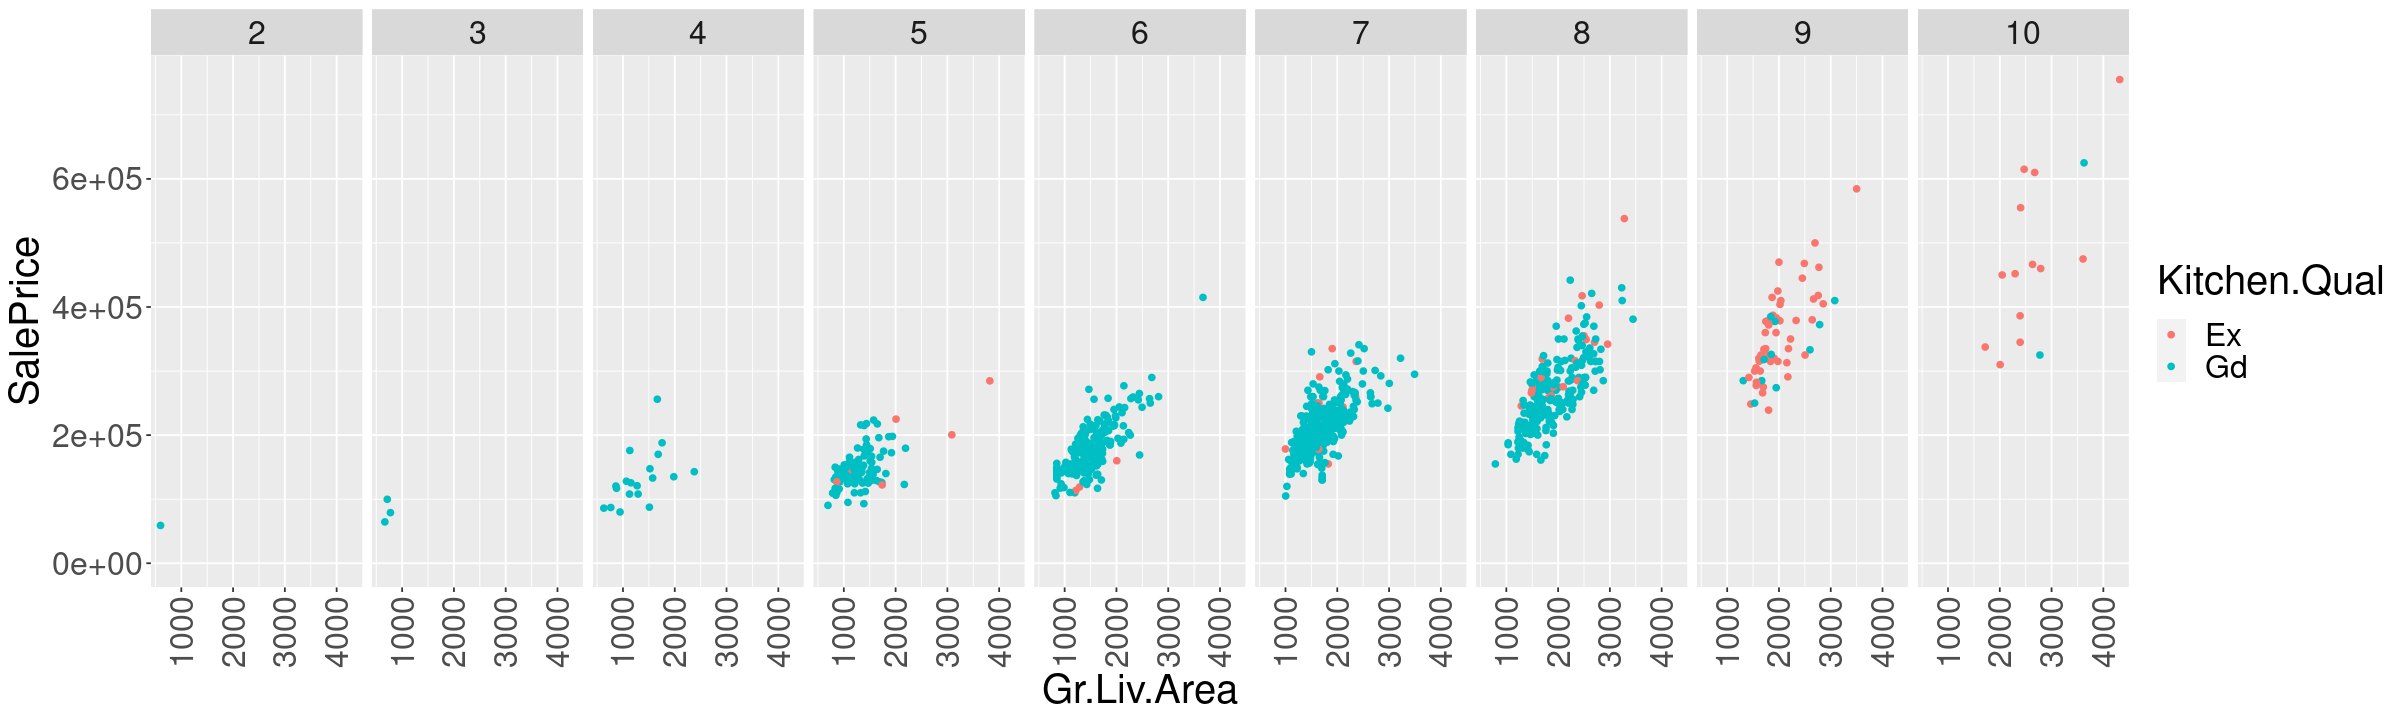

In [14]:
options(repr.plot.width=20, repr.plot.height=6)
ames %>%
  ggplot() +
  geom_point(aes(x=Gr.Liv.Area, y=SalePrice, color=Kitchen.Qual)) +
  facet_grid( ~ Overall.Qual) +
  expand_limits(y=0) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
options(repr.plot.width=12, repr.plot.height=6)


This is getting difficult. What about a linear model?

In [11]:
lm(SalePrice ~ Gr.Liv.Area + Kitchen.Qual + Overall.Qual, ames) %>% 
    summary()


Call:
lm(formula = SalePrice ~ Gr.Liv.Area + Kitchen.Qual + Overall.Qual, 
    data = ames)

Residuals:
    Min      1Q  Median      3Q     Max 
-143175  -19875   -1192   18301  150483 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     32630.906  34316.248   0.951  0.34188    
Gr.Liv.Area        77.251      2.451  31.524  < 2e-16 ***
Kitchen.QualGd -19904.252   4506.865  -4.416 1.11e-05 ***
Overall.Qual3   12932.882  39229.663   0.330  0.74171    
Overall.Qual4   17359.803  34900.926   0.497  0.61901    
Overall.Qual5   35439.120  34151.188   1.038  0.29964    
Overall.Qual6   49218.494  34127.289   1.442  0.14954    
Overall.Qual7   65443.802  34124.965   1.918  0.05541 .  
Overall.Qual8  107153.925  34189.871   3.134  0.00177 ** 
Overall.Qual9  167573.989  34581.308   4.846 1.45e-06 ***
Overall.Qual10 241076.614  35627.832   6.767 2.19e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 33970 on 

In [12]:
lm(SalePrice ~ Gr.Liv.Area + Kitchen.Qual, ames) %>% 
    summary()


Call:
lm(formula = SalePrice ~ Gr.Liv.Area + Kitchen.Qual, data = ames)

Residuals:
    Min      1Q  Median      3Q     Max 
-238658  -24841   -2552   23240  240508 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)    115200.021   7234.776   15.92   <2e-16 ***
Gr.Liv.Area       104.977      2.912   36.05   <2e-16 ***
Kitchen.QualGd -79532.676   4606.565  -17.27   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45460 on 1053 degrees of freedom
Multiple R-squared:  0.6561,    Adjusted R-squared:  0.6555 
F-statistic:  1005 on 2 and 1053 DF,  p-value: < 2.2e-16

# Prediction

What if we just asked a different question: can we predict the cost of a
house using kitchen quality?

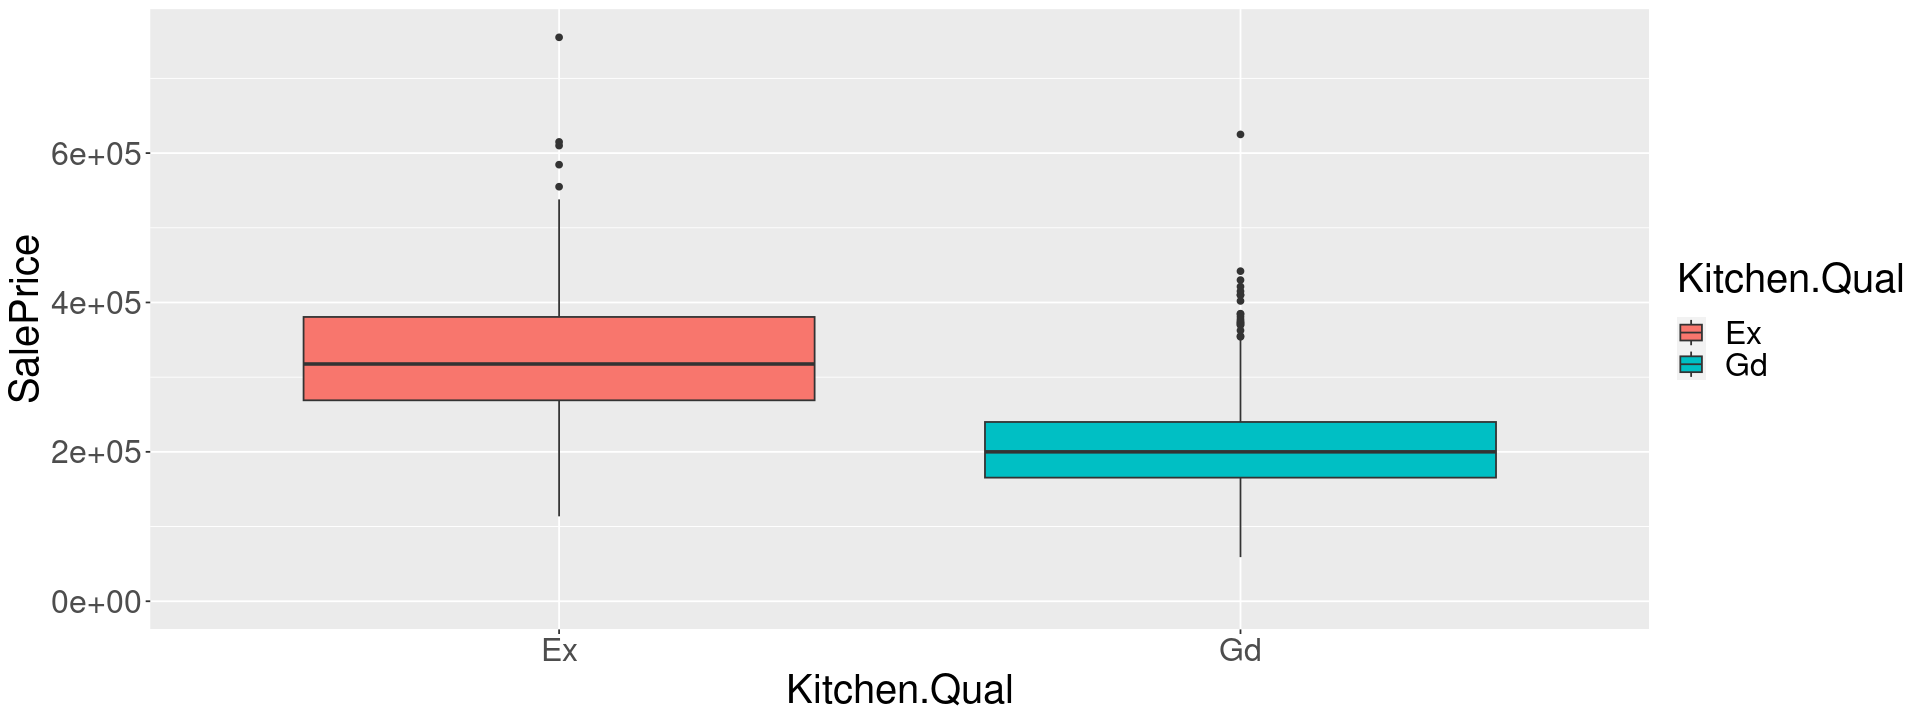

In [13]:
ames %>%
  ggplot() +
      geom_boxplot(aes(x=Kitchen.Qual, y=SalePrice, fill=Kitchen.Qual))+
      expand_limits(y=0)

In [27]:
all_rows <- 1:nrow(ames)
train_rows <- sample(all_rows, floor(nrow(ames) / 2), replace=FALSE)
test_rows <- setdiff(all_rows, train_rows) 
print(length(train_rows) / nrow(ames)) # Sanity check

ames_train <- ames[train_rows, ]
ames_test <- 

[1] 0.5

In [31]:
means_df <-
    ames_train %>%
        group_by(Overall.Qual, Kitchen.Qual) %>%
        summarize(mean_price=mean(SalePrice), .groups="drop")

overall_mean <- mean(ames_train$SalePrice)

print(means_df)
print(overall_mean)

# A tibble: 14 × 3
   Overall.Qual Kitchen.Qual mean_price
   <fct>        <chr>             <dbl>
 1 2            Gd               59000 
 2 3            Gd               71750 
 3 4            Gd              130773.
 4 5            Ex              193090 
 5 5            Gd              150789.
 6 6            Ex              119000 
 7 6            Gd              174765.
 8 7            Ex              250200 
 9 7            Gd              205622.
10 8            Ex              299546.
11 8            Gd              261577.
12 9            Ex              365413.
13 9            Gd              315347.
14 10           Ex              534238.
[1] 218291.4

In [39]:
ames_test <- 
    ames[test_rows, ] %>%
    select(SalePrice, Overall.Qual, Kitchen.Qual) %>%
    inner_join(means_df, by=c("Overall.Qual", "Kitchen.Qual")) %>%  # Note: drops missing values!
    mutate(err_pred=SalePrice - mean_price, err_base=SalePrice - overall_mean) %>%
    summarize(rmse_pred=sqrt(mean(err_pred^2)), rmse_base=sqrt(mean(err_base^2))) 

print(ames_test)

  rmse_pred rmse_base
1  49188.21  75377.99